Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


Streaming output truncated to the last 5000 lines.
[INFO] processed 3478/8360, Plastic
[INFO] processed 3479/8360, Plastic
[INFO] processed 3480/8360, Plastic
[INFO] processed 3481/8360, Plastic
[INFO] processed 3482/8360, Plastic
[INFO] processed 3483/8360, Plastic
[INFO] processed 3484/8360, Plastic
[INFO] processed 3485/8360, Plastic
[INFO] processed 3486/8360, Plastic
[INFO] processed 3487/8360, Plastic
[INFO] processed 3488/8360, Plastic
[INFO] processed 3489/8360, Plastic
[INFO] processed 3490/8360, Plastic
[INFO] processed 3491/8360, Plastic
[INFO] processed 3492/8360, Plastic
[INFO] processed 3493/8360, Plastic
[INFO] processed 3494/8360, Plastic
[INFO] processed 3495/8360, Plastic
[INFO] processed 3496/8360, Plastic
[INFO] processed 3497/8360, Plastic
[INFO] processed 3498/8360, Plastic
[INFO] processed 3499/8360, Plastic
[INFO] processed 3500/8360, Plastic
[INFO] processed 3501/8360, Plastic
[INFO] processed 3502/8360, Plastic
[INFO] processed 3503/8360, Plastic
[INFO] proces

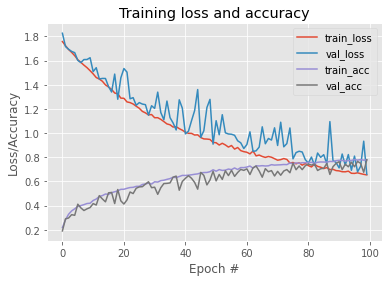

In [1]:
 from google.colab import drive 
drive.mount('/content/drive')
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_list = drive.ListFile(
    {'q': "'1ZQeS3F0HBwiEY0c3MLlMpnn7l_raK_6d' in parents"}).GetList()
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import img_to_array
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dense
from keras import backend as K

print("Loading Images")
imagePaths = list(paths.list_images("/content/drive/My Drive/Images/By_Contaminent"))
print(imagePaths)
verbose=-1
data = []
labels = []

# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
  image = cv2.imread(imagePath)
  label = imagePath.split(os.path.sep)[-2]
  image=cv2.resize(image, (32, 32),
  interpolation=cv2.INTER_AREA)
  image=img_to_array(image, None)
  data.append(image)
  labels.append(label)
  print("[INFO] processed {}/{}, {}".format(i + 1, len(imagePaths), label))

data= np.array(data)
labels = np.array(labels)
data = data.astype("float")/255.0
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

print("Compiling Model")
opt = tf.keras.optimizers.SGD(lr=0.005)
model = Sequential()
inputShape = (32, 32, 3)

if K.image_data_format() == "channels_first":
  inputShape = (3, 32, 32)

model.add(Conv2D(32, (3, 3), padding="same",
input_shape=inputShape))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=50, epochs=100, verbose=-1)
print("Evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["Clean", "Salt", "Soil", "Sand", "Algae", "Plastic"]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

  
